In [44]:
## 날짜, 주차장 명 기준으로 데이터 groupby
## 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

## preprocessing

- preprocessing(df)

In [2]:
datetime_format = '%Y-%m-%d 오후 %H시 %M분 %S초'
sample_datetime = '2022-07-05 오후 8시 50분 02초'

time_result = time.strptime(sample_datetime, datetime_format)
print(time_result)
print(time_result.tm_mon)  ## 월
print(time_result.tm_mday) ## 일
print(time_result.tm_hour) ## 시
print(time_result.tm_min)  ## 분

time.struct_time(tm_year=2022, tm_mon=7, tm_mday=5, tm_hour=8, tm_min=50, tm_sec=2, tm_wday=1, tm_yday=186, tm_isdst=-1)
7
5
8
50


In [3]:
## 데이터프레임과 총 주차 가능 대수를 입력으로 받음
def preprocessing(df): #, total_parking):
    
    ## 사용률을 계산하여 새로운 열 추가
    df['사용률'] = 1 - (df['주차 가능 대수'] / df['주차 구획수']) ###################### 주차 구획 수 = 총 주차 가능 대수 ? 확인해 보아야 함!
    
    return df

## visualization

- visualization_data(df)

In [4]:
from matplotlib import rc
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

['C:\\Windows\\Fonts\\courbi.ttf',
 'C:\\Windows\\Fonts\\constanz.ttf',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\H2GSRB.TTF',
 'C:\\Windows\\Fonts\\ARIALNB.TTF',
 'C:\\Windows\\Fonts\\YuGothR.ttc',
 'C:\\Windows\\Fonts\\ntailub.ttf',
 'C:\\Windows\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\HARNGTON.TTF',
 'C:\\Windows\\Fonts\\segoeuil.ttf',
 'C:\\Windows\\Fonts\\GILLUBCD.TTF',
 'C:\\Windows\\Fonts\\phagspab.ttf',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\ADVC39D.TTF',
 'C:\\Windows\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\LSANSDI.TTF',
 'C:\\Windows\\Fonts\\SCRIPTBL.TTF',
 'C:\\Windows\\Fonts\\H2MJSM.TTF',
 'C:\\Windows\\Fonts\\ROCKI.TTF',
 'C:\\Windows\\Fonts\\Gabriola.ttf',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\Candarali.ttf',
 'C:\\Windows\\Fonts\\simsun.ttc',
 'C:\\Windows\\Fonts\\Candara.ttf',
 'C:\\Windows\\Fonts\\BELLI.TTF',
 'C:\\Windows\\Fonts\\LEELAWDB.TTF',
 'C:\\Windows\\Fonts\\ms

In [5]:
## 주피터 한글 깨짐 방지 - https://jimmy-ai.tistory.com/133
from matplotlib import rc
import matplotlib.font_manager as fm

# fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:\\Windows\\Fonts\\HYHWPEQ.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
plt.rc('font', family='HYHWPEQ')

In [6]:
def visualization_data(df):
    crawling_time = df['정보 제공 시간']
    left_parking = df['주차 가능 대수']
    
    ## 데이터 시각화
    #ax = plt.gca()
    df.plot(kind='line', 
            x='정보 제공 시간', 
            y='주차 가능 대수', 
            color='blue', 
            figsize=(16, 16), 
            title='한강 주차 가능 대수 시각화'
           ) #, ax=ax)

    ## 시각화 결과 저장
    plt.savefig('output.png')

## 데이터 시각화 - main

- 여의도 한강 공원 주차장 관련 데이터로 테스트 (23:39 주변 데이터 날짜 수정 완료 후)

In [8]:
df_Yeouido = pd.read_excel('df_Yeouido - 복사본.xlsx', engine='openpyxl')
df_Yeouido = df_Yeouido.drop(columns='Unnamed: 0')
df_Yeouido#.head(10)

,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
0,2022-07-05,오후,9시 25분 22초,여의도1주차장,서울 영등포구 여의도동 86-5,633,462,"17,483"
1,2022-07-05,오후,9시 25분 22초,여의도2주차장,서울 영등포구 여의도동 84-4,25,171,"6,630"
2,2022-07-05,오후,9시 25분 22초,여의도3주차장,서울 영등포구 여의도동 83-6,788,800,"21,630"
3,2022-07-05,오후,9시 25분 22초,여의도4주차장,서울 영등포구 여의도동 19,134,141,"4,861"
4,2022-07-05,오후,9시 25분 22초,여의도5주차장,서울 영등포구 여의도동 63,201,217,"9,918"
...,...,...,...,...,...,...,...,...
1080,2022-07-06,오후,3시 25분 37초,여의도1주차장,서울 영등포구 여의도동 86-5,377,462,"17,483"
1081,2022-07-06,오후,3시 25분 37초,여의도2주차장,서울 영등포구 여의도동 84-4,0,171,"6,630"
1082,2022-07-06,오후,3시 25분 37초,여의도3주차장,서울 영등포구 여의도동 83-6,339,800,"21,630"
1083,2022-07-06,오후,3시 25분 37초,여의도4주차장,서울 영등포구 여의도동 19,7,141,"4,861"


In [9]:
## 데이터 수 확인
print('len data:', len(df_Yeouido))

len data: 1085


- 지역 내 주차장 명에 따라 데이터 groupby

In [10]:
## 주차장 명에 따라 데이터 groupby - 여의도

groups = df_Yeouido.groupby(df_Yeouido.주차장명)

df_Yeouido_1 = groups.get_group('여의도1주차장')
df_Yeouido_2 = groups.get_group('여의도2주차장')
df_Yeouido_3 = groups.get_group('여의도3주차장')
df_Yeouido_4 = groups.get_group('여의도4주차장')
df_Yeouido_5 = groups.get_group('여의도5주차장')

In [11]:
print('len df_Yeouido_1:', len(df_Yeouido_1))
df_Yeouido_1

len df_Yeouido_1: 217


,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
0,2022-07-05,오후,9시 25분 22초,여의도1주차장,서울 영등포구 여의도동 86-5,633,462,"17,483"
5,2022-07-05,오후,9시 30분 17초,여의도1주차장,서울 영등포구 여의도동 86-5,629,462,"17,483"
10,2022-07-05,오후,9시 35분 01초,여의도1주차장,서울 영등포구 여의도동 86-5,635,462,"17,483"
15,2022-07-05,오후,9시 40분 33초,여의도1주차장,서울 영등포구 여의도동 86-5,647,462,"17,483"
20,2022-07-05,오후,9시 45분 29초,여의도1주차장,서울 영등포구 여의도동 86-5,659,462,"17,483"
...,...,...,...,...,...,...,...,...
1060,2022-07-06,오후,3시 05분 26초,여의도1주차장,서울 영등포구 여의도동 86-5,368,462,"17,483"
1065,2022-07-06,오후,3시 10분 31초,여의도1주차장,서울 영등포구 여의도동 86-5,372,462,"17,483"
1070,2022-07-06,오후,3시 15분 21초,여의도1주차장,서울 영등포구 여의도동 86-5,377,462,"17,483"
1075,2022-07-06,오후,3시 20분 29초,여의도1주차장,서울 영등포구 여의도동 86-5,385,462,"17,483"


In [12]:
print('len df_Yeouido_2:', len(df_Yeouido_2))
df_Yeouido_2

len df_Yeouido_2: 217


,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
1,2022-07-05,오후,9시 25분 22초,여의도2주차장,서울 영등포구 여의도동 84-4,25,171,"6,630"
6,2022-07-05,오후,9시 30분 17초,여의도2주차장,서울 영등포구 여의도동 84-4,24,171,"6,630"
11,2022-07-05,오후,9시 35분 01초,여의도2주차장,서울 영등포구 여의도동 84-4,24,171,"6,630"
16,2022-07-05,오후,9시 40분 33초,여의도2주차장,서울 영등포구 여의도동 84-4,26,171,"6,630"
21,2022-07-05,오후,9시 45분 29초,여의도2주차장,서울 영등포구 여의도동 84-4,25,171,"6,630"
...,...,...,...,...,...,...,...,...
1061,2022-07-06,오후,3시 05분 26초,여의도2주차장,서울 영등포구 여의도동 84-4,0,171,"6,630"
1066,2022-07-06,오후,3시 10분 31초,여의도2주차장,서울 영등포구 여의도동 84-4,0,171,"6,630"
1071,2022-07-06,오후,3시 15분 21초,여의도2주차장,서울 영등포구 여의도동 84-4,0,171,"6,630"
1076,2022-07-06,오후,3시 20분 29초,여의도2주차장,서울 영등포구 여의도동 84-4,0,171,"6,630"


In [13]:
print('len df_Yeouido_3:', len(df_Yeouido_3))
df_Yeouido_3

len df_Yeouido_3: 217


,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
2,2022-07-05,오후,9시 25분 22초,여의도3주차장,서울 영등포구 여의도동 83-6,788,800,"21,630"
7,2022-07-05,오후,9시 30분 17초,여의도3주차장,서울 영등포구 여의도동 83-6,790,800,"21,630"
12,2022-07-05,오후,9시 35분 01초,여의도3주차장,서울 영등포구 여의도동 83-6,795,800,"21,630"
17,2022-07-05,오후,9시 40분 33초,여의도3주차장,서울 영등포구 여의도동 83-6,796,800,"21,630"
22,2022-07-05,오후,9시 45분 29초,여의도3주차장,서울 영등포구 여의도동 83-6,799,800,"21,630"
...,...,...,...,...,...,...,...,...
1062,2022-07-06,오후,3시 05분 26초,여의도3주차장,서울 영등포구 여의도동 83-6,338,800,"21,630"
1067,2022-07-06,오후,3시 10분 31초,여의도3주차장,서울 영등포구 여의도동 83-6,335,800,"21,630"
1072,2022-07-06,오후,3시 15분 21초,여의도3주차장,서울 영등포구 여의도동 83-6,333,800,"21,630"
1077,2022-07-06,오후,3시 20분 29초,여의도3주차장,서울 영등포구 여의도동 83-6,336,800,"21,630"


In [14]:
print('len df_Yeouido_4:', len(df_Yeouido_4))
df_Yeouido_4

len df_Yeouido_4: 217


,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
3,2022-07-05,오후,9시 25분 22초,여의도4주차장,서울 영등포구 여의도동 19,134,141,"4,861"
8,2022-07-05,오후,9시 30분 17초,여의도4주차장,서울 영등포구 여의도동 19,133,141,"4,861"
13,2022-07-05,오후,9시 35분 01초,여의도4주차장,서울 영등포구 여의도동 19,135,141,"4,861"
18,2022-07-05,오후,9시 40분 33초,여의도4주차장,서울 영등포구 여의도동 19,137,141,"4,861"
23,2022-07-05,오후,9시 45분 29초,여의도4주차장,서울 영등포구 여의도동 19,137,141,"4,861"
...,...,...,...,...,...,...,...,...
1063,2022-07-06,오후,3시 05분 26초,여의도4주차장,서울 영등포구 여의도동 19,3,141,"4,861"
1068,2022-07-06,오후,3시 10분 31초,여의도4주차장,서울 영등포구 여의도동 19,3,141,"4,861"
1073,2022-07-06,오후,3시 15분 21초,여의도4주차장,서울 영등포구 여의도동 19,5,141,"4,861"
1078,2022-07-06,오후,3시 20분 29초,여의도4주차장,서울 영등포구 여의도동 19,4,141,"4,861"


In [15]:
print('len df_Yeouido_5:', len(df_Yeouido_5))
df_Yeouido_5

len df_Yeouido_5: 217


,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
4,2022-07-05,오후,9시 25분 22초,여의도5주차장,서울 영등포구 여의도동 63,201,217,"9,918"
9,2022-07-05,오후,9시 30분 17초,여의도5주차장,서울 영등포구 여의도동 63,201,217,"9,918"
14,2022-07-05,오후,9시 35분 01초,여의도5주차장,서울 영등포구 여의도동 63,201,217,"9,918"
19,2022-07-05,오후,9시 40분 33초,여의도5주차장,서울 영등포구 여의도동 63,202,217,"9,918"
24,2022-07-05,오후,9시 45분 29초,여의도5주차장,서울 영등포구 여의도동 63,201,217,"9,918"
...,...,...,...,...,...,...,...,...
1064,2022-07-06,오후,3시 05분 26초,여의도5주차장,서울 영등포구 여의도동 63,29,217,"9,918"
1069,2022-07-06,오후,3시 10분 31초,여의도5주차장,서울 영등포구 여의도동 63,26,217,"9,918"
1074,2022-07-06,오후,3시 15분 21초,여의도5주차장,서울 영등포구 여의도동 63,27,217,"9,918"
1079,2022-07-06,오후,3시 20분 29초,여의도5주차장,서울 영등포구 여의도동 63,29,217,"9,918"


- 주차장 명을 기준으로 groupby한 데이터를 다시 날짜 기준으로 groupby
- 단, 테스트는 여의도 22년 07월 06일 데이터를 사용하여 진행함

- 여의도1주차장 22년 07월 06일 시간 - 혼잡도 시각화

In [16]:
## 사용률 열 추가
'''
df_Yeouido_1 = preprocessing(df_Yeouido_1)
df_Yeouido_1'''

'\ndf_Yeouido_1 = preprocessing(df_Yeouido_1)\ndf_Yeouido_1'

In [28]:
## 날짜 별 groupby
groups_df_Yeouido_1 = df_Yeouido_1.groupby(df_Yeouido.날짜)
groups_df_Yeouido_2 = df_Yeouido_2.groupby(df_Yeouido.날짜)
groups_df_Yeouido_3 = df_Yeouido_3.groupby(df_Yeouido.날짜)
groups_df_Yeouido_4 = df_Yeouido_4.groupby(df_Yeouido.날짜)
groups_df_Yeouido_5 = df_Yeouido_5.groupby(df_Yeouido.날짜)

df_Yeouido_1_220706 = groups_df_Yeouido_1.get_group('2022-07-06')
df_Yeouido_2_220706 = groups_df_Yeouido_2.get_group('2022-07-06')
df_Yeouido_3_220706 = groups_df_Yeouido_3.get_group('2022-07-06')
df_Yeouido_4_220706 = groups_df_Yeouido_4.get_group('2022-07-06')
df_Yeouido_5_220706 = groups_df_Yeouido_5.get_group('2022-07-06')

In [29]:
print('len df_Yeouido_1_220706:', len(df_Yeouido_1_220706))
df_Yeouido_1_220706

len df_Yeouido_1_220706: 186


,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
155,2022-07-06,오전,12시 00분 18초,여의도1주차장,서울 영등포구 여의도동 86-5,742,462,"17,483"
160,2022-07-06,오전,12시 05분 14초,여의도1주차장,서울 영등포구 여의도동 86-5,744,462,"17,483"
165,2022-07-06,오전,12시 10분 10초,여의도1주차장,서울 영등포구 여의도동 86-5,743,462,"17,483"
170,2022-07-06,오전,12시 15분 25초,여의도1주차장,서울 영등포구 여의도동 86-5,740,462,"17,483"
175,2022-07-06,오전,12시 20분 10초,여의도1주차장,서울 영등포구 여의도동 86-5,742,462,"17,483"
...,...,...,...,...,...,...,...,...
1060,2022-07-06,오후,3시 05분 26초,여의도1주차장,서울 영등포구 여의도동 86-5,368,462,"17,483"
1065,2022-07-06,오후,3시 10분 31초,여의도1주차장,서울 영등포구 여의도동 86-5,372,462,"17,483"
1070,2022-07-06,오후,3시 15분 21초,여의도1주차장,서울 영등포구 여의도동 86-5,377,462,"17,483"
1075,2022-07-06,오후,3시 20분 29초,여의도1주차장,서울 영등포구 여의도동 86-5,385,462,"17,483"


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45733 missing from c

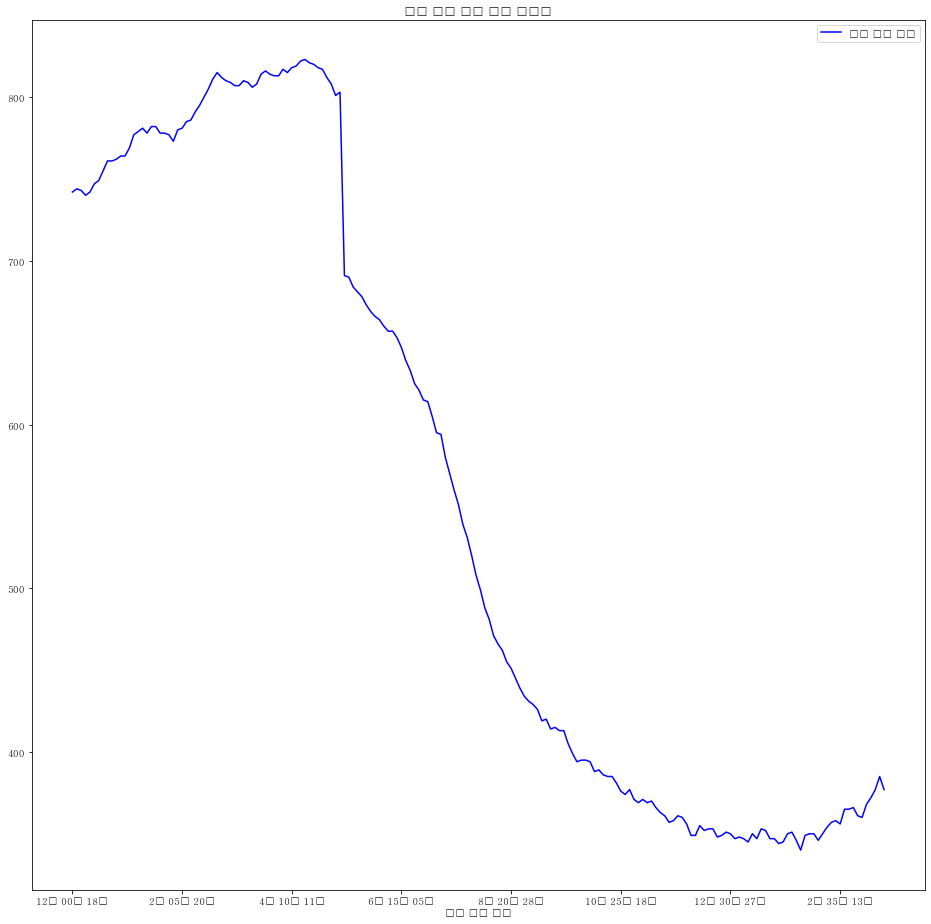

In [30]:
## 시간 - 주차 가능 대수 시각화
visualization_data(df_Yeouido_1_220706)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45733 missing from c

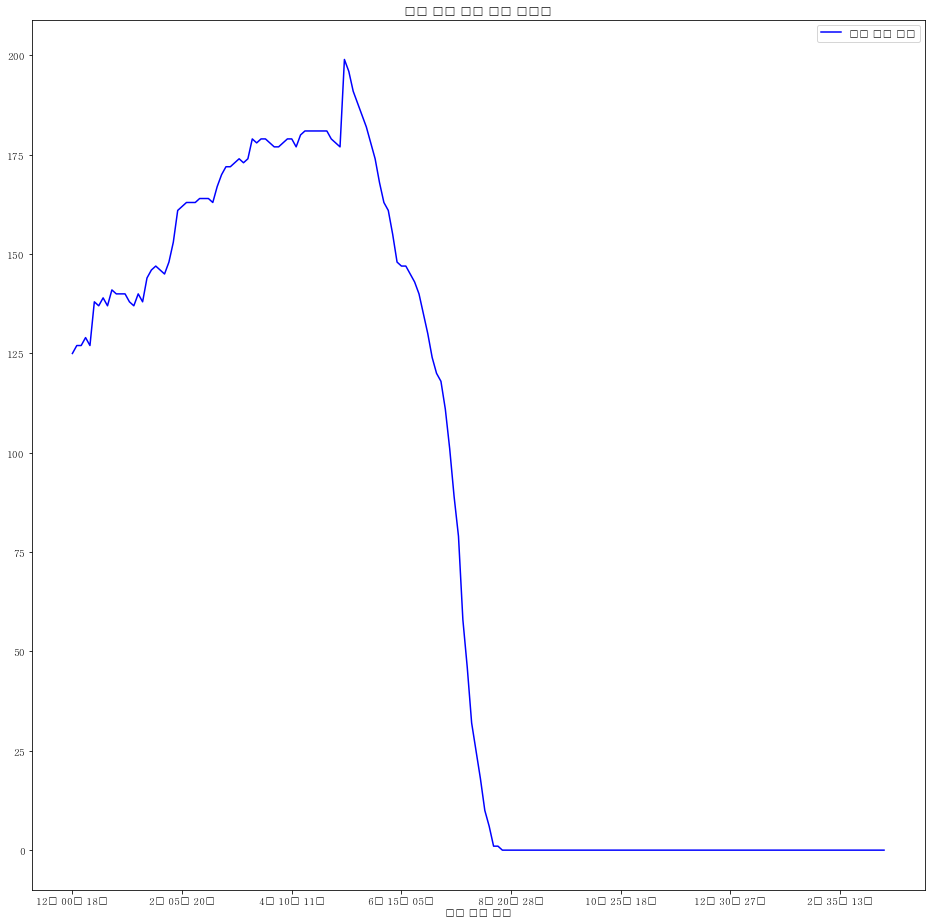

In [31]:
visualization_data(df_Yeouido_2_220706)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45733 missing from c

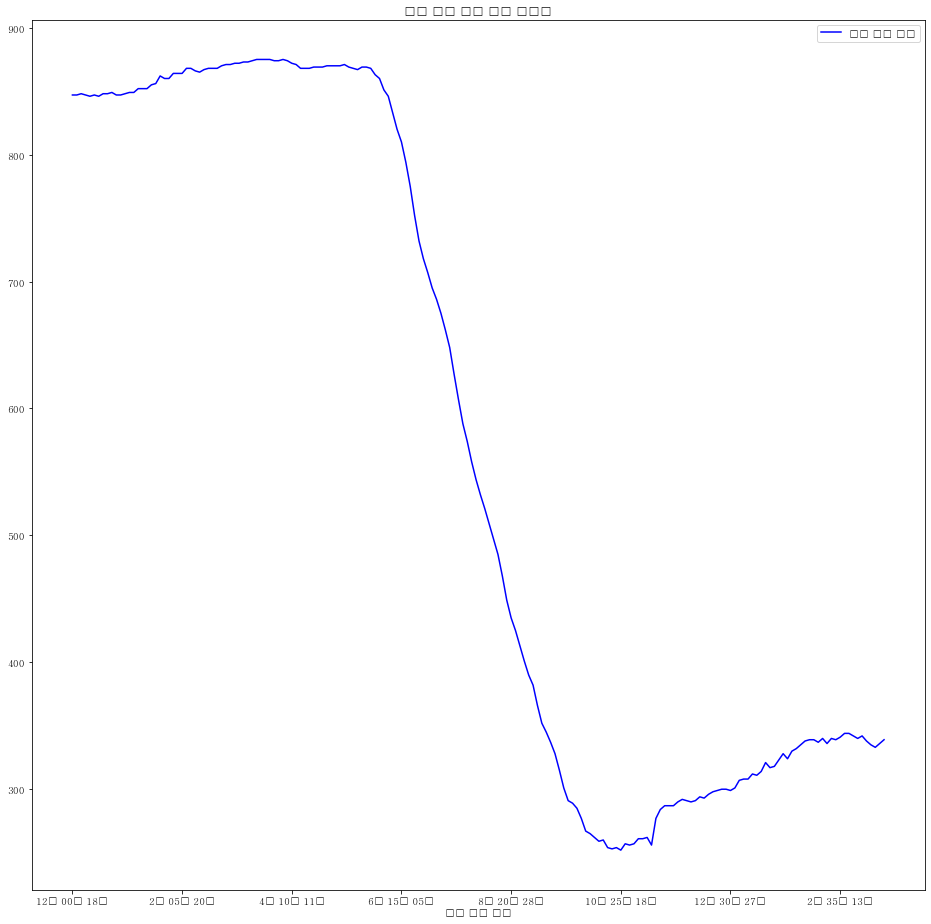

In [44]:
visualization_data(df_Yeouido_3_220706)

- 광나루 한강 공원 주차장 관련 데이터로 테스트 (23:39 주변 데이터 날짜 수정 완료 후)

In [32]:
df_Jamsil = pd.read_excel('df_Jamsil - 복사본.xlsx', engine='openpyxl')
df_Jamsil = df_Jamsil.drop(columns='Unnamed: 0')
df_Jamsil#.head(10)

,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
0,2022-07-05,오후,9시 25분 22초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,247,471,"15,055"
1,2022-07-05,오후,9시 30분 17초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,252,471,"15,055"
2,2022-07-05,오후,9시 35분 01초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,246,471,"15,055"
3,2022-07-05,오후,9시 40분 33초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,251,471,"15,055"
4,2022-07-05,오후,9시 45분 29초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,260,471,"15,055"
...,...,...,...,...,...,...,...,...
224,2022-07-06,오후,4시 05분 25초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,248,471,"15,055"
225,2022-07-06,오후,4시 10분 24초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,249,471,"15,055"
226,2022-07-06,오후,4시 15분 03초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,258,471,"15,055"
227,2022-07-06,오후,4시 20분 06초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,256,471,"15,055"


In [35]:
## 데이터 수 확인
print('len data:', len(df_Jamsil))

len data: 229


- 지역이 1 개 이므로, 날짜에 따라서만 groupby

In [36]:
## 날짜 별 groupby
groups_df_Jamsil = df_Jamsil.groupby(df_Jamsil.날짜)

df_Jamsil_220706 = groups_df_Jamsil.get_group('2022-07-06')

In [37]:
print('len df_Jamsil_220706:', len(df_Jamsil_220706))
df_Jamsil_220706

len df_Jamsil_220706: 198


,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
31,2022-07-06,오전,12시 00분 18초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,351,471,"15,055"
32,2022-07-06,오전,12시 05분 14초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,354,471,"15,055"
33,2022-07-06,오전,12시 10분 10초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,355,471,"15,055"
34,2022-07-06,오전,12시 15분 25초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,354,471,"15,055"
35,2022-07-06,오전,12시 20분 10초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,356,471,"15,055"
...,...,...,...,...,...,...,...,...
224,2022-07-06,오후,4시 05분 25초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,248,471,"15,055"
225,2022-07-06,오후,4시 10분 24초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,249,471,"15,055"
226,2022-07-06,오후,4시 15분 03초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,258,471,"15,055"
227,2022-07-06,오후,4시 20분 06초,"잠실1,2,3,4주차장",서울 송파구 잠실동 1-1,256,471,"15,055"


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45733 missing from c

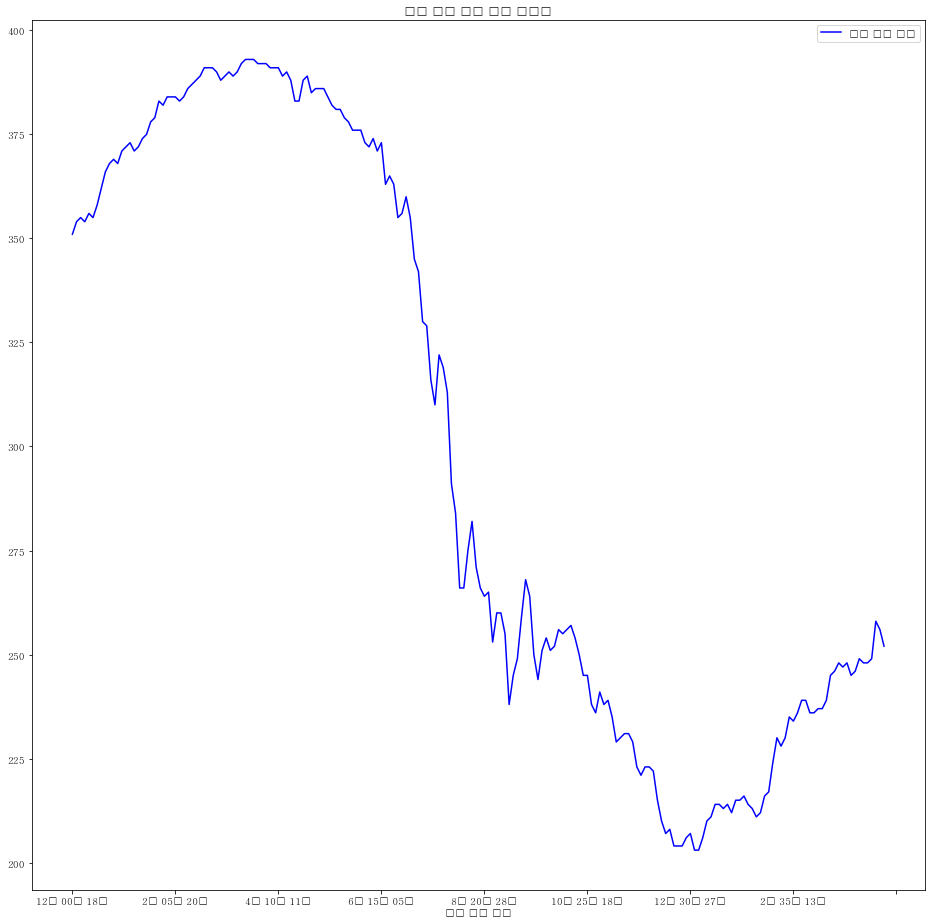

In [38]:
visualization_data(df_Jamsil_220706)

- 강서 한강 공원 주차장 관련 데이터로 테스트 (23:39 주변 데이터 날짜 수정 완료 후)

In [39]:
df_Gangseo = pd.read_excel('df_Gangseo - 복사본.xlsx', engine='openpyxl')
df_Gangseo = df_Gangseo.drop(columns='Unnamed: 0')
df_Gangseo#.head(10)

,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
0,2022-07-05,오후,9시 25분 22초,강서1주차장,서울 강서구 방화동 61,23,53,"2,184"
1,2022-07-05,오후,9시 30분 17초,강서1주차장,서울 강서구 방화동 61,24,53,"2,184"
2,2022-07-05,오후,9시 35분 01초,강서1주차장,서울 강서구 방화동 61,21,53,"2,184"
3,2022-07-05,오후,9시 40분 33초,강서1주차장,서울 강서구 방화동 61,21,53,"2,184"
4,2022-07-05,오후,9시 45분 29초,강서1주차장,서울 강서구 방화동 61,18,53,"2,184"
...,...,...,...,...,...,...,...,...
226,2022-07-06,오후,4시 15분 03초,강서1주차장,서울 강서구 방화동 61,40,53,"2,184"
227,2022-07-06,오후,4시 20분 06초,강서1주차장,서울 강서구 방화동 61,40,53,"2,184"
228,2022-07-06,오후,4시 25분 02초,강서1주차장,서울 강서구 방화동 61,40,53,"2,184"
229,2022-07-06,오후,4시 30분 00초,강서1주차장,서울 강서구 방화동 61,39,53,"2,184"


In [40]:
## 데이터 수 확인
print('len data:', len(df_Gangseo))

len data: 231


- 지역이 1 개 이므로, 날짜에 따라서만 groupby

In [41]:
## 날짜 별 groupby
groups_df_Gangseo = df_Gangseo.groupby(df_Gangseo.날짜)

df_Gangseo_220706 = groups_df_Gangseo.get_group('2022-07-06')

In [42]:
print('len df_Gangseo_220706:', len(df_Gangseo_220706))
df_Gangseo_220706

len df_Gangseo_220706: 208


,날짜,오전 오후,정보 제공 시간,주차장명,주소,주차 가능 대수,주차 구획수,면적
23,2022-07-06,오후,11시 20분 10초,강서1주차장,서울 강서구 방화동 61,38,53,"2,184"
24,2022-07-06,오후,11시 25분 01초,강서1주차장,서울 강서구 방화동 61,39,53,"2,184"
25,2022-07-06,오후,11시 30분 27초,강서1주차장,서울 강서구 방화동 61,38,53,"2,184"
26,2022-07-06,오후,11시 35분 07초,강서1주차장,서울 강서구 방화동 61,38,53,"2,184"
27,2022-07-06,오후,11시 40분 03초,강서1주차장,서울 강서구 방화동 61,38,53,"2,184"
...,...,...,...,...,...,...,...,...
226,2022-07-06,오후,4시 15분 03초,강서1주차장,서울 강서구 방화동 61,40,53,"2,184"
227,2022-07-06,오후,4시 20분 06초,강서1주차장,서울 강서구 방화동 61,40,53,"2,184"
228,2022-07-06,오후,4시 25분 02초,강서1주차장,서울 강서구 방화동 61,40,53,"2,184"
229,2022-07-06,오후,4시 30분 00초,강서1주차장,서울 강서구 방화동 61,39,53,"2,184"


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45733 missing from c

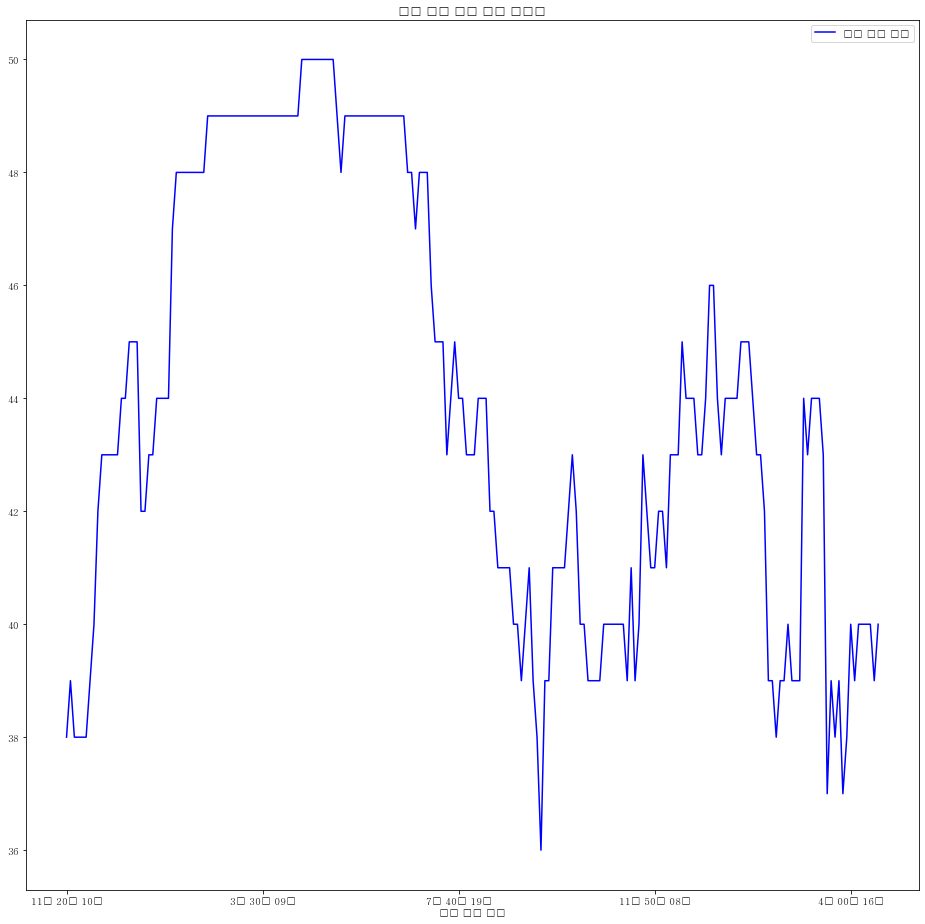

In [43]:
visualization_data(df_Gangseo_220706)